# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [67]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold, ShuffleSplit
from sklearn.metrics import make_scorer


# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [68]:
data.head(5)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [69]:
features.head(5)

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [70]:
prices.head(5)

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

In [5]:
# TODO: Minimum price of the data
minimum_price = prices.min() # is the same as below. Both invoke numpy and give the same output. 
minimum_price = np.min(prices) # This is what is recommended by the mentor. Why is this way prefered? They function identically?/

# TODO: Maximum price of the data
maximum_price = prices.max()
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = prices.mean()
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = prices.median()
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = prices.std()
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
* <b>An increase in RM should correlate with increased housing price (MDEV). More rooms, more money. Space is spendy.
* An increase in LSTAT should correlate with decreased MDEV.  Crime drives down housing prices.
* An increase in PTRATIO should correlate with decreased MDEV. Well funded/more desirable schools have better ratios.

In [6]:
print('The above assumptions appear to be accurate.')

df_corr = pd.DataFrame(data.corr()).drop(['RM', 'LSTAT', 'PTRATIO'], axis = 1).drop(['MEDV'], axis = 0)
df_corr

The above assumptions appear to be accurate.


,MEDV
RM,0.697209
LSTAT,-0.760670
PTRATIO,-0.519034


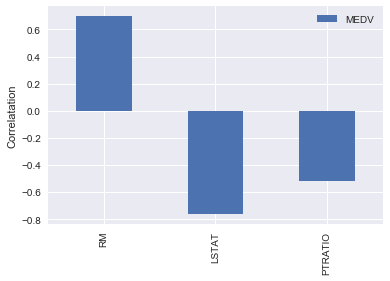

In [7]:
df_corr.plot(kind = 'bar')
plt.ylabel('Correlatation')
plt.show()

In [8]:
features.columns

Index([u'RM', u'LSTAT', u'PTRATIO'], dtype='object')

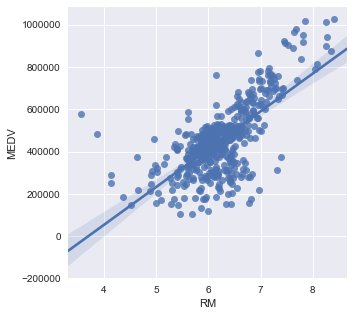

In [9]:
plt.figure(figsize=[5, 5])
sns.regplot(y="MEDV", x="RM", data=data, fit_reg = True)

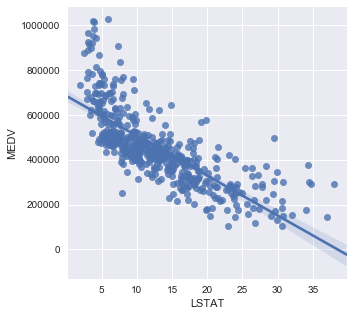

In [10]:
plt.figure(figsize=[5, 5])
sns.regplot(y="MEDV", x="LSTAT", data=data, fit_reg = True)

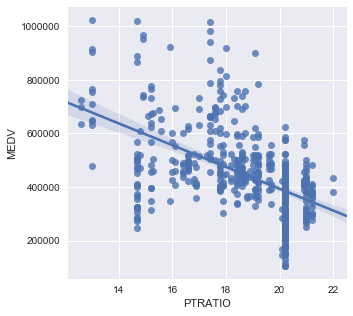

In [11]:
plt.figure(figsize=[5, 5])
sns.regplot(y="MEDV", x="PTRATIO", data=data, fit_reg = True)

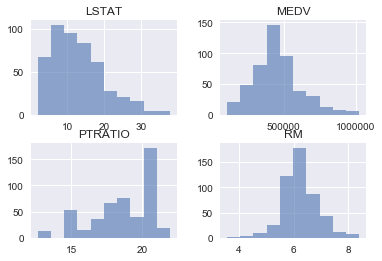

In [12]:
fig = plt.figure(figsize = [6,4])
data.hist(alpha=0.6)
sns.set_style("whitegrid")
plt.show()

---

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [13]:
from sklearn.metrics import r2_score 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [14]:
# Calculate the performance of this model
a, b = [3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]
score = performance_metric(a,b)
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
* <b>The model has a high R^2 score and would be considered a good fit in most circumstances

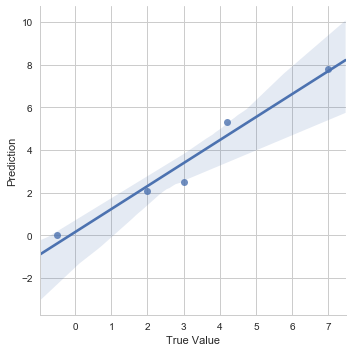

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_a_b = pd.DataFrame(zip(a,b), columns = ['True Value', 'Prediction'])
sns.lmplot(x = 'True Value', y = 'Prediction', data = df_a_b)
plt.show()

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [16]:
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = .20, random_state = 42)

# Success
if len(X_train) < len(features):
    print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
* <b>Subselecting data for training and testing helps prevent model overfitting. Training and parameter optimization on the training set makes the model naive to the test data. Performance on the test data is therefore indicative of how well the model will generalize for future unseen data. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

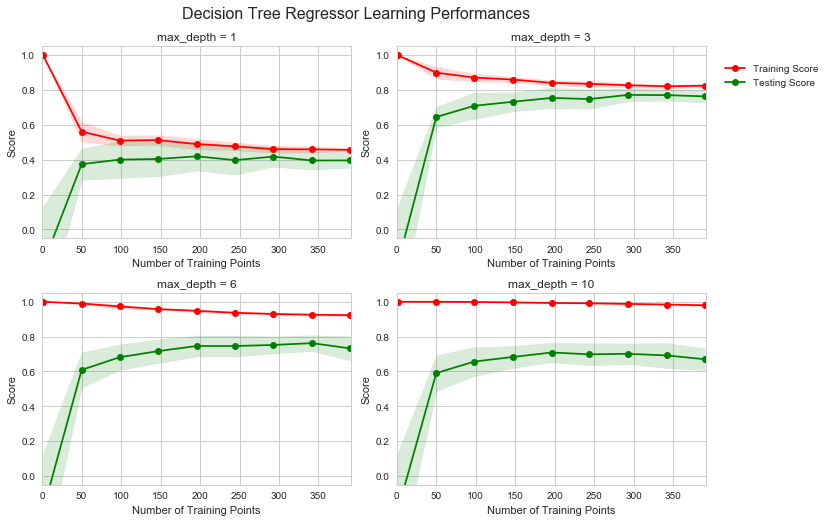

In [17]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
* <b>Max depth of 3 is best performance (i.e. highest accuracy for both training and testing set) - best bias/variance tradeoff. A depth of 3 is sufficiently complex to make accurate predictions but is not too complex to suffer from excess variance, which would cause poor performance during testing. Excess variance is a byproduct of overfitting. Excess bias, from underfitting. 
* As the sample size increases, the test score accuracy increases. This is likely because increased sample number (at this depth) is creating a more generalizable model. Beyond a certain point, there is likely diminishing returns by having ever more sample numbers.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

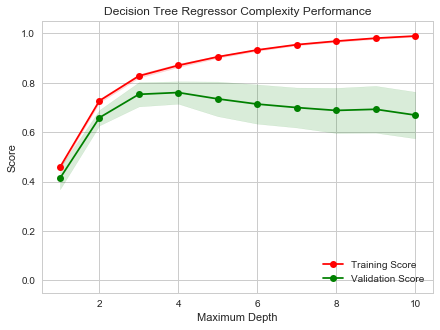

In [18]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
* <b>Depth 1 = high bias. The model is underfitted and poorly respresents the relationships between features and labels.
* Depth 10 = high variance. The model is overfittied to the training set and generalizes poorly. Overfitting can impair accuracy by making a model overly influenced by random noise and outliers in a training dataset. 

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
* <b>Depth 3. High peformance on training set generalized to test set. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

In [19]:
GridSearchCV??

**Answer: **
* <b> Grid search (i.e. GridSearchCV) is a method used for parameter optimization. It that allows you to cycle through multiple parameters for an algorithm and evaluate/compare model performance. 
* How does it work: GridSearchCV allows you to train a model using different parameters (various depths for random forest or c penalty, or rbf vs linear for SVM etc.) for a particular model, the performance of which can be evaluated by a certain metric (accuracy, rmse etc...depending on the model being tested). This technique saves time by testing these parameters and yielding a model with the combination of parameters that perform most highly. Inputs can be an estimator, a dictionary of parameters to test, and the number of folds for cross validation (default is 3).

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
* <b> k-fold cross validation is a technique used for model validation. It splits up the reserved training set into k training and validation sets. It allows you to test model fitting/generalization within your training data before touching your reserved test data for a final validation step. 
* If you used grid serch w/out cross-validation, you are vulnerable to overfitting (i.e. choosing parameters that confer high model variance then perform poorly with test data). 
* k stands for the number of folds (ways to break up the data..i.e 5 folds would split 100 samples into groups of 20...for one training/validation set, 80 samples would be used for training and 20 for validation, this would happen serially through all groups of 20 (of which there are 5). The split should happened in a shuffled manner. This is important if the order that data is organized by columns is not random (i.e. if an index is days of year, and columns are purchase behavior, etc..you wouldn't want to train only on Jan - Nov and expect this to generalized well to December). 
* Cross_val_score does not choose a best result...it provides a way to test how well your model is likely to generlize to the training set (i.e. you could run it with 5 folds and look at both mean and std for accuracy; this would give you some idea for where accuracy is likely to be for the actual test set).
* You always want to do some form of cross validation before touching your test set since this will help you predict your models likely performance on the test set. For instance, if you get a model to be super accurate in a Kaggle competition but never to any cross validation, you could be disappointed.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [20]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
  

    # Create cross-validation sets from the training data
    #cv_sets = ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=0)
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric) #> Including this spits out a long string of R^2 scores. Anyway to suppress this?

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator = regressor, param_grid = params,  cv = cv_sets, scoring = scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [21]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** <b>Max depth of 4 is optimal for decision tree regressor algorithm.

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

df = pd.DataFrame(zip(lr_predict, y_test), columns = ['predict','actual'])
df.head()

,predict,actual
0,342593.790298,401100.0
1,506257.091630,501900.0
2,410499.931662,319200.0
3,237792.741154,147000.0
4,327005.796532,247800.0


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [23]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

client_output = []
price_output = []
# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    client_output.append(i)
    price_output.append(price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


In [24]:
np.asarray(client_output)
np.asarray(price_output)
price_df = zip(client_output, price_output)
price_df = pd.DataFrame(price_df)
price_df.drop([0], axis = 1, inplace= True)
price_df.index = ['Client 1','Client 2', 'Client 3']

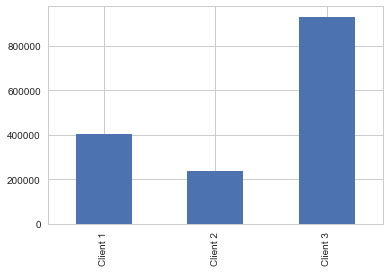

In [25]:
price_df.plot(kind = 'bar')
plt.legend('')
plt.show()

In [26]:
data.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [27]:
data.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


In [28]:
data[(data['RM'] >= 5) & (data['RM'] <= 6) & (data['LSTAT'] >= 17) & (data['LSTAT'] <= 18) & (data['PTRATIO']  >= 12) & (data['PTRATIO'] <=18)]

,RM,LSTAT,PTRATIO,MEDV
211,5.951,17.92,16.4,451500.0


In [29]:
data[(data['RM'] >= 4) & (data['RM'] < 5) & (data['LSTAT'] >= 30) & (data['LSTAT'] <= 34) & (data['PTRATIO']  >= 20) & (data['PTRATIO'] <=22)]

,RM,LSTAT,PTRATIO,MEDV
367,4.368,30.63,20.2,184800.0
371,4.880,30.62,20.2,214200.0


In [30]:
data[(data['RM'] >= 8) & (data['RM'] <= 9) & (data['LSTAT'] >= 3) & (data['LSTAT'] <= 6) & (data['PTRATIO']  >= 12) & (data['PTRATIO'] <=13)]

,RM,LSTAT,PTRATIO,MEDV
253,8.398,5.91,13.0,1024800.0


**Answer: **
* <b>It looks like we're on the money for client 1, relative to historical data.
* We're in close approximatation for client 2.
* We're likely under-projecting the house price for client 3. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [31]:
sens = vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


## Testing with linear regression:

In [54]:
sm.OLS(X_train, y_train)
from statsmodels.formula.api import ols

#### univariate

In [71]:
rm_lr = ols('MEDV ~ RM', data).fit()
rm_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     460.7
Date:                Mon, 12 Jun 2017   Prob (F-statistic):           2.05e-72
Time:                        13:22:02   Log-Likelihood:                -6406.3
No. Observations:                 489   AIC:                         1.282e+04
Df Residuals:                     487   BIC:                         1.282e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.633e+05   5.23e+04    -12.671      0.000   -7.66e+05    -5.6e+05
RM          1.791e+05   8344.563     21.463      0.000    1.63e+05    1.95e+05
==============================================================================
Omnibus:                       30.484   Durbin-Watson:                   0.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.540
Skew:                          -0.170   Prob(JB):                     1.79e-21
Kurtosis:                       5.139   Cond. No.                         62.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
lstat_lr = ols('MEDV ~ LSTAT', data).fit()
lstat_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Mon, 12 Jun 2017   Prob (F-statistic):           1.93e-93
Time:                        13:22:25   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.841e+05   1.01e+04     67.551      0.000    6.64e+05    7.04e+05
LSTAT      -1.776e+04    686.746    -25.860      0.000   -1.91e+04   -1.64e+04
==============================================================================
Omnibus:                      105.652   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.227
Skew:                           1.217   Prob(JB):                     9.03e-44
Kurtosis:                       4.950   Cond. No.                         30.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
ptratio_lr = ols('MEDV ~ PTRATIO', data).fit()
ptratio_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 12 Jun 2017   Prob (F-statistic):           4.44e-35
Time:                        13:22:48   Log-Likelihood:                -6492.3
No. Observations:                 489   AIC:                         1.299e+04
Df Residuals:                     487   BIC:                         1.300e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.207e+06   5.65e+04     21.352      0.000     1.1e+06    1.32e+06
PTRATIO    -4.065e+04   3033.277    -13.400      0.000   -4.66e+04   -3.47e+04
==============================================================================
Omnibus:                       28.657   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.381
Skew:                           0.498   Prob(JB):                     7.64e-09
Kurtosis:                       3.918   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## multivariate

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lm = LinearRegression()

In [76]:
m = lm.fit(X_train, y_train)

In [77]:
pd.DataFrame(zip(features.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,RM,87322.203619
1,LSTAT,-10620.637315
2,PTRATIO,-19324.410296


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
*<b>The model performs with reasonable consistency for the simulated client above (i.e. only flucuates in a range fo 30K for a house selling for approximately 400K.
* Housing markets change signficantly with time, and may be strongly influenced by both market demand. Moreover, at any specific location, such as near Boston, developments in urban planning can measurably influence the cost of houseing (i.e. via gentrification, mass transit, etc.) what may make properties more or less appealing. For this specifc dataset, much of the information is likely antiquated. The teacher to student ratio has likely changed, crime statistics have consistently declined and are dated, and inflation has changed the numeric value of homes - i.e. the data would need to be, at minimum, adjusted to reflect the forces of inflation in order to be more accurate. 
* Model is robust enough to make specific predictions within a limited range.
* Data collected from an urban city is not likley to translate well to a rural city. It is possible that certain themes might apply, but their overall weight (in the case of a linear regression model, their coefficients) are likely to be very different.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.